In [1]:
from subprocess import check_output
from google.colab import drive
drive.mount('/content/gdrive')
print(check_output(["ls", "../content/gdrive/My Drive/Colab Notebooks/Project 1 | Computer Vision with CNN/"]).decode("utf8"))

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive
Project_1_Computer_Vision_With_CNN.ipynb
test
train



In [2]:
import os, sys
from IPython.display import display
from IPython.display import Image as _Imgdis
from PIL import Image
import numpy as np
from time import time
from time import sleep
from random import shuffle
import cv2
import tensorflow as tf
import keras
import glob

Using TensorFlow backend.


In [0]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
            images.append(filename)
    return images

In [0]:
IMG_SIZE = 96
train_folder = "../content/gdrive/My Drive/Colab Notebooks/Project 1 | Computer Vision with CNN/train/" 
test_folder = "../content/gdrive/My Drive/Colab Notebooks/Project 1 | Computer Vision with CNN/test"

train_files_array = [f for f in os.listdir(train_folder) if os.path.isdir(os.path.join(train_folder, f))]
                
train_files = {};

for i in range(0, len(train_files_array) - 1):
    image_set = {train_files_array[i] : load_images_from_folder(os.path.join(train_folder, train_files_array[i]))}
    train_files.update(image_set)
    
test_files = load_images_from_folder(test_folder)

Image Set Scentless Mayweed : Number of Images: 516 

Image Set Sugar beet : Number of Images: 385 

Image Set Common wheat : Number of Images: 221 

Image Set Loose Silky-bent : Number of Images: 654 

Image Set Common Chickweed : Number of Images: 611 

Image Set Black-grass : Number of Images: 263 

Image Set Cleavers : Number of Images: 287 

Image Set Small-flowered Cranesbill : Number of Images: 496 

Image Set Fat Hen : Number of Images: 475 

Image Set Shepherds Purse : Number of Images: 241 

Image Set Maize : Number of Images: 221 

Train Image example: 



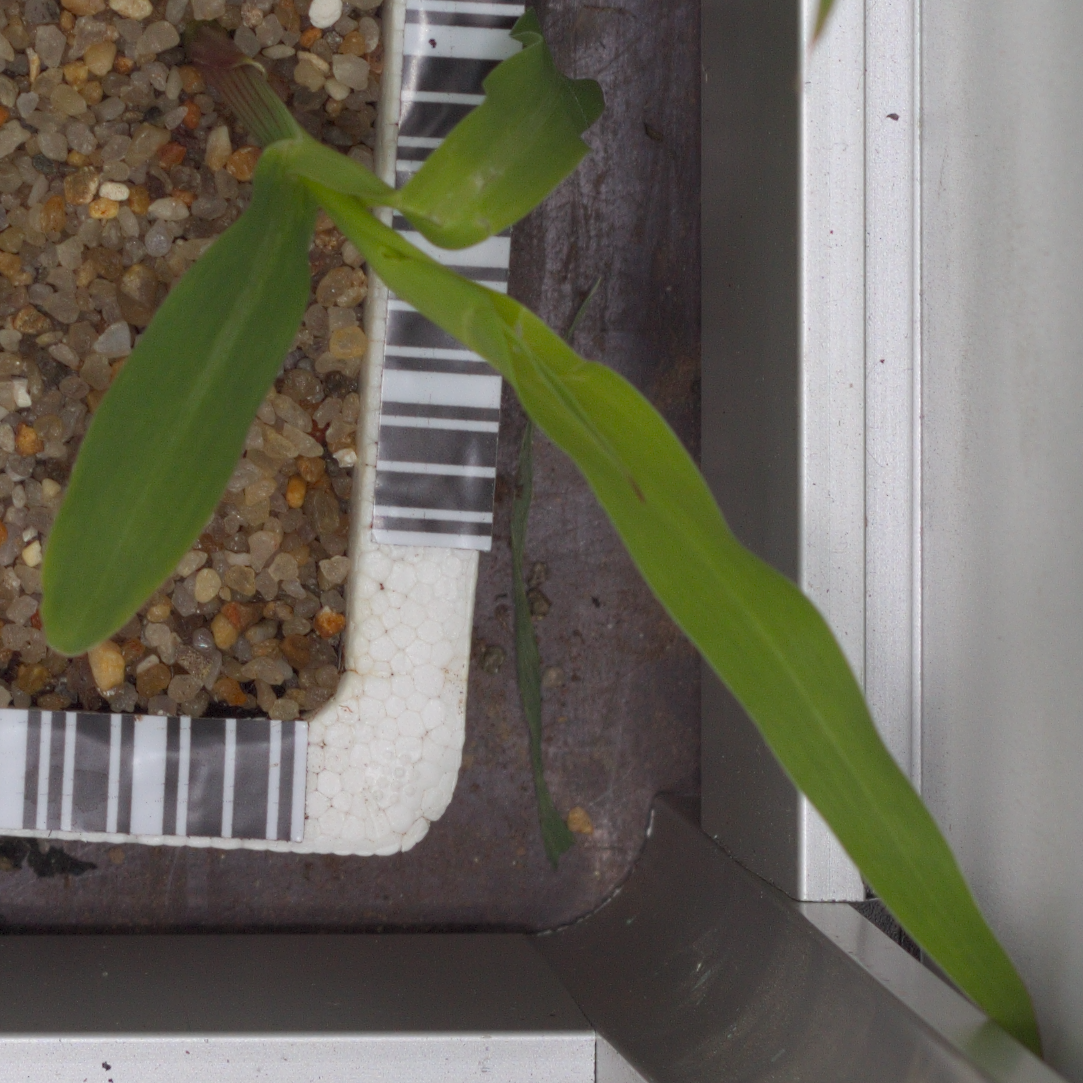


 Working with 794 Test images 

Test Image Example: 



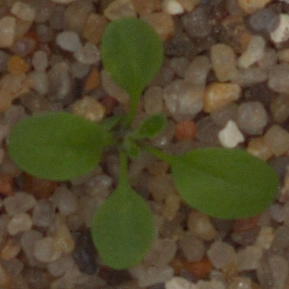

In [29]:
for image_set, content in train_files.items():
    print("Image Set", image_set, ": Number of Images:", len(content), "\n")

print("Train Image example: \n")
display(_Imgdis(filename=train_folder + "/" + image_set + "/" + content[0], width=240, height=320))
    
print("\n Working with {0} Test images \n".format(len(test_files)))

print("Test Image Example: \n")
display(_Imgdis(filename=test_folder + "/" + test_files[0], width=240, height=320))

## POC for Retrieving Data

In [0]:
#Abandoning this cell, only a proof of concept, kindly ignore
def label_img(word_label):                       
    if word_label == 'Black-grass': return [1,0,0,0,0,0,0,0,0,0,0,0]
    elif word_label == 'Charlock': return [0,1,0,0,0,0,0,0,0,0,0,0]
    elif word_label == 'Cleavers': return [0,0,1,0,0,0,0,0,0,0,0,0]
    elif word_label == 'Common Chickweed': return [0,0,0,1,0,0,0,0,0,0,0,0]
    elif word_label == 'Common wheat': return [0,0,0,0,1,0,0,0,0,0,0,0]
    elif word_label == 'Fat Hen': return [0,0,0,0,0,1,0,0,0,0,0,0]
    elif word_label == 'Loose Silky-bent': return [0,0,0,0,0,0,1,0,0,0,0,0]
    elif word_label == 'Maize': return [0,0,0,0,0,0,0,1,0,0,0,0]
    elif word_label == 'Scentless Mayweed': return [0,0,0,0,0,0,0,0,1,0,0,0]
    elif word_label == 'Shepherds Purse': return [0,0,0,0,0,0,0,0,0,1,0,0]
    elif word_label == 'Small-flowered Cranesbill': return [0,0,0,0,0,0,0,0,0,0,1,0]
    elif word_label == 'Sugar beet': return [0,0,0,0,0,0,0,0,0,0,0,1]

In [0]:
#Abandoning this cell, only a proof of concept, kindly ignore
def create_train_data():
    train = []
    for image_set, content in train_files.items():
        for img in content:
            label=label_img(image_set)
            path=os.path.join(train_folder,image_set,img)
            img=cv2.imread(path,cv2.IMREAD_GRAYSCALE)
            img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
            train.append([np.array(img),np.array(label)])
    shuffle(train)
    return train

In [0]:
#Abandoning this cell, only a proof of concept, kindly ignore
def create_test_data():
    test = []
    for img in test_files:
        path = os.path.join(test_folder,img)
        img_num = img
        img = cv2.imread(path,cv2.IMREAD_GRAYSCALE)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        test.append([np.array(img), img_num]) 
    shuffle(test)
    return test

In [0]:
#train_data = create_train_data()
#test_data = create_test_data()

In [0]:
#Abandoning this cell, only a proof of concept, kindly ignore
X_train = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
Y_train = [i[1] for i in train_data]

x_test = np.array([i[0] for i in test_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y_test = [i[1] for i in test_data]

In [0]:
#Abandoning this cell, only a proof of concept, kindly ignore
test_data[0][0][1][4]

66

## Kindly ignore above POC, working code starts below

In [0]:
#Referenced from Kaggle Kernel
def load_train(path,plants,size):
    images=[]
    labels=[]
    ids=[]
    clas=[]
    for fold in plants:
        print("Fold: ", fold)
        index=plants.index(fold)
        pat = os.path.join(path, fold)
        files = glob.glob(pat+'/*')
        i = 0;
        for f1 in files:
            i = i + 1;
            im=cv2.imread(f1)
            image = cv2.resize(im, (size, size), cv2.INTER_LINEAR)
            images.append(image)
            label = np.zeros(len(plants))
            label[index] = 1.0
            labels.append(label)
            if(i == 200):
              print(i)
              break;
    images = np.array(images)
    labels = np.array(labels)
    images = images.astype(np.float32)
    images = np.multiply(images, 1.0 / 255.0)
    return images,labels

In [66]:
print("Image Size: ", IMG_SIZE)
X, Y = load_train(train_folder, train_files_array, IMG_SIZE)

Image Size:  96
Fold:  Scentless Mayweed
200
Fold:  Sugar beet
200
Fold:  Common wheat
200
Fold:  Loose Silky-bent
200
Fold:  Common Chickweed
200
Fold:  Black-grass
200
Fold:  Cleavers
200
Fold:  Small-flowered Cranesbill
200
Fold:  Fat Hen
200
Fold:  Shepherds Purse
200
Fold:  Maize
200
Fold:  Charlock
200


In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X, Y, test_size=0.25, random_state = 7, shuffle = True)
print(x_train.shape,x_test.shape, y_train.shape, y_test.shape)

(1800, 96, 96, 3) (600, 96, 96, 3) (1800, 12) (600, 12)


In [0]:
x_train_conv = x_train.reshape(x_train.shape[0], IMG_SIZE, IMG_SIZE, 3)
x_test_conv = x_test.reshape(x_test.shape[0], IMG_SIZE, IMG_SIZE, 3)

In [82]:
print(x_train_conv.shape)
print(x_test_conv.shape)

(1800, 96, 96, 3)
(600, 96, 96, 3)


In [0]:
#Subsample the data for more efficient code execution in this exercise (Abandoning)
num_training =  1200
mask = range(num_training)
#X_train = x_train_conv[mask]
#trainY = y_train[mask]

num_test = 300
mask = range(num_test)
#X_test = x_test_conv[mask]
#testY = y_test[mask]

In [0]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Flatten, Dense, Dropout
from keras import backend as K
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping, ModelCheckpoint

In [0]:
#Attempting to use Data Augmentation
datagen = ImageDataGenerator(
    featurewise_center=False,  
    samplewise_center=False,  
    featurewise_std_normalization=False,  
    samplewise_std_normalization=False,  
    rotation_range=25,  
    width_shift_range=0.1,  
    height_shift_range=0.1,  
    horizontal_flip=False,  
    vertical_flip=False)  

In [0]:
# Set up the generator
datagen.fit(x_train_conv)
callback = [EarlyStopping(monitor='val_loss', patience = 5)]

In [0]:
model_data_augment = Sequential()

model_data_augment.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(MaxPooling2D(pool_size=(2, 2)))
model_data_augment.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(MaxPooling2D(pool_size=(2, 2)))
model_data_augment.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(Flatten())
model_data_augment.add(Dense(128, activation='relu'))
model_data_augment.add(keras.layers.BatchNormalization())
model_data_augment.add(Dense(12, activation='softmax'))

In [90]:
model_data_augment.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
batch_normalization_9 (Batch (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
batch_normalization_10 (Batc (None, 45, 45, 64)        256       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 20, 20, 128)       73856     
__________

In [0]:
model_data_augment.compile(loss='categorical_crossentropy', optimizer = "adam", metrics=['accuracy'])

In [93]:
history = model_data_augment.fit_generator(datagen.flow(x_train_conv, y_train, batch_size = 768), 
                validation_data = (x_test_conv, y_test), steps_per_epoch=len(x_train_conv) / 32 , use_multiprocessing = True, epochs = 7, callbacks = callback)

Epoch 1/7
57/56 [==============================] - 74s 1s/step - loss: 0.3127 - acc: 0.9099 - val_loss: 0.9641 - val_acc: 0.6833
Epoch 2/7
57/56 [==============================] - 73s 1s/step - loss: 0.1258 - acc: 0.9696 - val_loss: 1.0383 - val_acc: 0.7417
Epoch 3/7
57/56 [==============================] - 71s 1s/step - loss: 0.0619 - acc: 0.9858 - val_loss: 0.6742 - val_acc: 0.7817
Epoch 4/7
57/56 [==============================] - 71s 1s/step - loss: 0.0335 - acc: 0.9943 - val_loss: 0.9766 - val_acc: 0.7783
Epoch 5/7
57/56 [==============================] - 72s 1s/step - loss: 0.0251 - acc: 0.9954 - val_loss: 1.1520 - val_acc: 0.7533
Epoch 6/7
57/56 [==============================] - 74s 1s/step - loss: 0.0164 - acc: 0.9979 - val_loss: 0.8408 - val_acc: 0.7950
Epoch 7/7
57/56 [==============================] - 72s 1s/step - loss: 0.0158 - acc: 0.9971 - val_loss: 1.8528 - val_acc: 0.6850


In [94]:
model_data_augment.evaluate(x_test_conv, y_test)

600/600 [==============================] - 0s 479us/step


[1.8527826118469237, 0.6849999992052714]

In [0]:
#Average accuracy, Lets now try a rather simple model

In [0]:
model_simple_conv = Sequential()

model_simple_conv.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(Conv2D(32, kernel_size = (3, 3), activation = "relu", input_shape=(IMG_SIZE, IMG_SIZE, 3)))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(128, activation='relu'))
model_simple_conv.add(keras.layers.BatchNormalization())
model_simple_conv.add(Dense(12, activation='softmax'))

model_simple_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [96]:
output_simple_conv = model_simple_conv.fit(x_train_conv, y_train, callbacks = callback, batch_size = 512,
                                           epochs = 10, verbose = 1, validation_data = (x_test_conv, y_test))

Train on 1800 samples, validate on 600 samples
Epoch 1/10
1800/1800 [==============================] - 7s 4ms/step - loss: 2.9343 - acc: 0.2439 - val_loss: 3.6696 - val_acc: 0.3217
Epoch 2/10
1800/1800 [==============================] - 1s 764us/step - loss: 1.4996 - acc: 0.5578 - val_loss: 4.5160 - val_acc: 0.2017
Epoch 3/10
1800/1800 [==============================] - 1s 759us/step - loss: 1.0528 - acc: 0.6711 - val_loss: 5.7992 - val_acc: 0.2267
Epoch 4/10
1800/1800 [==============================] - 1s 765us/step - loss: 0.8196 - acc: 0.7506 - val_loss: 5.0149 - val_acc: 0.2483
Epoch 5/10
1800/1800 [==============================] - 1s 762us/step - loss: 0.5978 - acc: 0.8472 - val_loss: 3.6382 - val_acc: 0.3017
Epoch 6/10
1800/1800 [==============================] - 1s 762us/step - loss: 0.4389 - acc: 0.9094 - val_loss: 3.2946 - val_acc: 0.3433
Epoch 7/10
1800/1800 [==============================] - 1s 766us/step - loss: 0.3134 - acc: 0.9444 - val_loss: 3.7220 - val_acc: 0.3167
Epo

In [97]:
model_simple_conv.evaluate(x_test_conv, y_test)

600/600 [==============================] - 0s 505us/step


[3.931942367553711, 0.3066666662693024]

In [0]:
#A rather poor model. Lets try with pooling and without Data Augmentation

In [0]:
model_pooling_conv = Sequential()

model_pooling_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(IMG_SIZE,IMG_SIZE,3)))
model_pooling_conv.add(keras.layers.BatchNormalization())
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_pooling_conv.add(keras.layers.BatchNormalization())
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(keras.layers.BatchNormalization())
model_pooling_conv.add(Dense(12, activation='softmax'))

model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="adam", metrics=['accuracy'])

In [100]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
batch_normalization_16 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 45, 45, 64)        18496     
_________________________________________________________________
batch_normalization_17 (Batc (None, 45, 45, 64)        256       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 22, 64)        0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 30976)             0         
__________

In [101]:
output_pooling_conv = model_pooling_conv.fit(x_train_conv, y_train, callbacks = callback, batch_size = 512, 
                                             epochs = 10, verbose=1, validation_data=(x_test_conv, y_test))
                

Train on 1800 samples, validate on 600 samples
Epoch 1/10
1800/1800 [==============================] - 3s 2ms/step - loss: 3.3282 - acc: 0.2067 - val_loss: 2.3939 - val_acc: 0.3783
Epoch 2/10
1800/1800 [==============================] - 1s 474us/step - loss: 1.5929 - acc: 0.5567 - val_loss: 1.9855 - val_acc: 0.3783
Epoch 3/10
1800/1800 [==============================] - 1s 468us/step - loss: 1.0810 - acc: 0.7017 - val_loss: 2.6003 - val_acc: 0.3433
Epoch 4/10
1800/1800 [==============================] - 1s 472us/step - loss: 0.7523 - acc: 0.8322 - val_loss: 1.9087 - val_acc: 0.4300
Epoch 5/10
1800/1800 [==============================] - 1s 471us/step - loss: 0.5563 - acc: 0.8950 - val_loss: 1.8730 - val_acc: 0.4183
Epoch 6/10
1800/1800 [==============================] - 1s 473us/step - loss: 0.4032 - acc: 0.9383 - val_loss: 1.7957 - val_acc: 0.4350
Epoch 7/10
1800/1800 [==============================] - 1s 472us/step - loss: 0.2833 - acc: 0.9667 - val_loss: 1.7108 - val_acc: 0.4217
Epo

In [0]:
#Again a rather poor accuracy, the model with data augmented seemed the best in this case, so lets evaluate it further

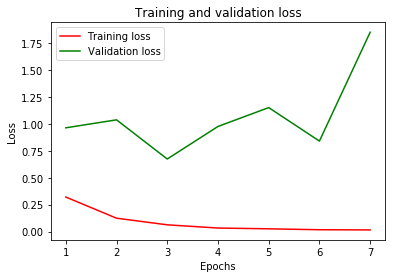

In [103]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, color='red', label='Training loss')
plt.plot(epochs, val_loss, color='green', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

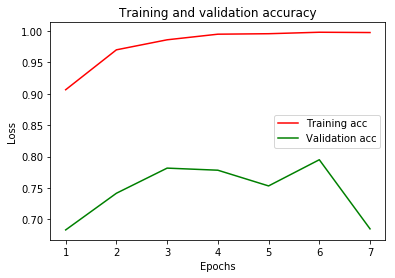

In [104]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, color='red', label='Training acc')
plt.plot(epochs, val_acc, color='green', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [0]:
#So it seems model has performed better and with lesser loss drastically on the 6th epoch and with an accuracy of approx 78%
#for the data augmentation case

In [107]:
data_augment_conv_score_train = model_data_augment.evaluate(x_train_conv, y_train)
print('Data Augmented Convolution Train loss:', data_augment_conv_score_train[0])
print('Data Augmented Convolution Train accuracy:', data_augment_conv_score_train[1])

data_augment_conv_score_test = model_data_augment.evaluate(x_test_conv, y_test)
print('Data Augmented Convolution Test loss:', data_augment_conv_score_test[0])
print('Data Augmented Convolution Test accuracy:', data_augment_conv_score_test[1])

1800/1800 [==============================] - 1s 300us/step
Data Augmented Convolution Train loss: 0.9517890649371678
Data Augmented Convolution Train accuracy: 0.8294444444444444
600/600 [==============================] - 0s 262us/step
Data Augmented Convolution Test loss: 1.8527826118469237
Data Augmented Convolution Test accuracy: 0.6849999992052714


Overall, this was a complex task due to image resolution being quite high originally and data augmented model provided much better accuracy than the pooling and simple CNN models.

However, after a lot of optimization which includes adding BatchNormalization for Regularization, adam optimizer, appropriate Batch Size and epoch length, appropriate steps per epoch, Adding Pooling and all wrapped in Data Augmentation provided a peak accuracy of 78% on the validation set and 99.7% on the training set, which is a satisfactory performance.

I believe the accuracy can be improved maybe by further finetuning the hyperparameters (number of epochs, optimizer configuration and batch size) for the data augmentation case, though there is the computational complexity drawback inherent in data augmentation cases.

Note that I had eatlier attempted to use 32 * 32 size resolution, which provided awful results so I increased the size to 64 * 64 and then to 96*96 for the best results. Also the dataset is quite large, hence preprocessing deeply could have helped improve model accuracy further. Earlier resolution of 128 by 128 was computationally difficult with current Colab GPU Environment, and may have provided better results.